### Pandas

#### Assignment 1.
pandas datareader library는 data를 읽어들여 pandas의 dataframe 객체로 저장하는데 도움이 되는 라이브러리 입니다

In [2]:
#pip install pandas_datareader
import datetime
import pandas_datareader as wb

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2024, 2, 20)
null = wb.DataReader("KOSPI", "naver", start, end)
series = null['Close'].dropna().astype('float')

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


series는 2012년 1월 1일부터 2024년 2월 20일까지의 코스피 데이터가 저장되어 있는 Pandas Series 객체입니다

In [3]:
import numpy as np, pandas as pd
series

Date
2012-01-02    1826.37
2012-01-03    1875.41
2012-01-04    1866.22
2012-01-05    1863.74
2012-01-06    1843.14
               ...   
2024-02-14    2620.42
2024-02-15    2613.80
2024-02-16    2648.76
2024-02-19    2680.26
2024-02-20    2657.79
Name: Close, Length: 2988, dtype: float64

5일, 20일, 60일, 120일 이동평균을 계산하는 함수(혹은 클래스)를 작성하고 결과를 출력하세요

In [4]:
def moving_avg(data, n):
    result=[]
    q=[]
    temp=data[0]*n
    
    for i in range(n):
        q.append(data[0])
    
    for price in data:
        temp=temp-q.pop(0)
        temp+=price
        result.append(temp/n)
        q.append(price)
        
    return result

print(moving_avg(series, 5))


[1826.3699999999997, 1836.1779999999999, 1844.148, 1851.622, 1854.976, 1855.0000000000005, 1850.5620000000004, 1846.4280000000003, 1846.5940000000003, 1853.102, 1859.6580000000001, 1867.5620000000004, 1876.9300000000003, 1887.0100000000002, 1901.852, 1920.444, 1933.3319999999999, 1947.8199999999997, 1952.9359999999997, 1954.1159999999995, 1955.5179999999996, 1960.9419999999996, 1962.4439999999995, 1968.9599999999996, 1974.1199999999994, 1983.0179999999993, 1989.0819999999992, 1993.355999999999, 1999.8779999999992, 2004.087999999999, 2008.405999999999, 2004.971999999999, 2010.923999999999, 2014.755999999999, 2019.075999999999, 2019.741999999999, 2021.8119999999992, 2021.095999999999, 2014.3479999999993, 2010.2379999999994, 2010.5579999999995, 2015.9239999999995, 2015.1579999999994, 2016.9979999999996, 2012.6899999999994, 2006.7919999999995, 2003.5259999999994, 2000.8139999999996, 2005.7499999999995, 2018.3359999999998, 2026.9359999999997, 2030.1639999999995, 2039.0639999999996, 2042.485

pandas의 내장 method `rolling.mean(window = n)`을 사용해 이동평균값을 계산하세요. 두 값은 차이가 있나요?

In [7]:
print(series.rolling(window=5).mean()) 
print(series.rolling(window=20).mean()) 
print(series.rolling(window=60).mean()) 
print(series.rolling(window=120).mean()) 

Date
2012-01-02         NaN
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06    1854.976
                ...   
2024-02-14    2615.232
2024-02-15    2622.752
2024-02-16    2630.588
2024-02-19    2642.576
2024-02-20    2644.206
Name: Close, Length: 2988, dtype: float64
Date
2012-01-02          NaN
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
                ...    
2024-02-14    2526.4805
2024-02-15    2532.2910
2024-02-16    2542.9340
2024-02-19    2554.9450
2024-02-20    2564.1975
Name: Close, Length: 2988, dtype: float64
Date
2012-01-02            NaN
2012-01-03            NaN
2012-01-04            NaN
2012-01-05            NaN
2012-01-06            NaN
                 ...     
2024-02-14    2538.480333
2024-02-15    2540.574000
2024-02-16    2543.555833
2024-02-19    2546.706833
2024-02-20    2549.163000
Name: Close, Length: 2988, dtype: float64
Date
2012-01-02            NaN
2012-01-03            NaN

#### Assignment 2.
1번에 사용한 series를 활용해 다음을 수행하세요

In [47]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2024, 2, 20)
null = wb.DataReader("KOSPI", "naver", start, end)
series = null['Close'].dropna().astype('float')

In [48]:
series

Date
2012-01-02    1826.37
2012-01-03    1875.41
2012-01-04    1866.22
2012-01-05    1863.74
2012-01-06    1843.14
               ...   
2024-02-14    2620.42
2024-02-15    2613.80
2024-02-16    2648.76
2024-02-19    2680.26
2024-02-20    2657.79
Name: Close, Length: 2988, dtype: float64

**Assignment 2-1**
- 시계열 데이터의 안정성을 위해 로그 차분 데이터를 사용합니다. 로그 차분은 다음과 같이 계산됩니다

$$r_t = \ln{P_t} - \ln{P_{t-1}}$$

- $r_t$는 수익률, 즉 로그 차분이며, $P$는 가격 데이터입니다. t는 어느 한 기간을 의미합니다.

Series를 활용해 로그 차분 데이터를 생성하세요

In [66]:
ret=np.log(series)-np.log(series.shift(1))

In [67]:
ret=ret.dropna()
ret

Date
2012-01-03    0.026497
2012-01-04   -0.004912
2012-01-05   -0.001330
2012-01-06   -0.011115
2012-01-09   -0.009075
                ...   
2024-02-14   -0.011089
2024-02-15   -0.002530
2024-02-16    0.013287
2024-02-19    0.011822
2024-02-20   -0.008419
Name: Close, Length: 2987, dtype: float64

**Assignment 2-2**

series에 표시된 NaN값을 제거한 뒤, 다음을 수행하세요

- 수익률이 변동한다는 것을 'Risk'라고 하며, 기간 리스크는 어느 한 기간의 수익률의 표준편차로 계산됩니다.

2024년 1월 1일부터 2024년 2월 20일의 기간동안의 KOSPI의 추정된 위험은 얼마입니까?

In [73]:
part1=ret.loc['2024-01-01':'2024-02-20']
print(np.sqrt(part1.var()))

0.01090825867506359


2023년 9월 1일부터 2023년 12월 31일까지의 KOSPI의 추정된 위험은 얼마입니까?

In [74]:
part2=ret.loc['2023-09-01':'2023-12-31']
print(np.sqrt(part2.var()))

0.011925242972251011


기간별 위험은 어느 쪽이 더 크게 추정되는지 확인해 보세요. 리스크는 언제가 더 큽니까?

In [72]:
# 2023년 9월부터 2023년 12월이 더 큼

#### Assignment 3.
이동평균선에 관련된 지표는 다음과 같은 것들이 있습니다
- MACD : 단기 이동평균(5일) - 장기 이동평균(60일)

$$\mathbf{MACD} = \mathbf{MA}(5) - \mathbf{MA}(60)$$

- Signal : MACD의 이동 평균값

$$\mathbf{Signal} = \mathbf {MA(MACD)}$$

- Stochastic : 일정기간의 가격 변동폭 중 현재의 위치를 백분율로 표시한 것

$$\frac{P_t - \min(P)}{\max{(P)} - \min{(P)}}$$

MACD를 구하는 함수와 5개의 MACD를 이용해 Signal을 계산하는 함수, Stochastic을 계산하는 함수를 만들어 pandas의 series형태로 출력하세요

In [77]:
def get_macd(data):
    return data.rolling(window=5).mean()-data.rolling(window=60).mean()

def get_signal(macd, n):
    return macd.rolling(window=n).mean()

def get_stochastic(data):
    min_price=data.min()
    max_price=data.max()
    return (data-min_price)/(max_price-min_price)

In [79]:
get_signal(get_macd(series), 20)

Date
2012-01-02          NaN
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
                ...    
2024-02-14     3.978208
2024-02-15     6.351075
2024-02-16    10.078200
2024-02-19    15.318658
2024-02-20    21.115267
Name: Close, Length: 2988, dtype: float64

In [80]:
get_stochastic(series)

Date
2012-01-02    0.199576
2012-01-03    0.226119
2012-01-04    0.221145
2012-01-05    0.219802
2012-01-06    0.208652
                ...   
2024-02-14    0.629356
2024-02-15    0.625773
2024-02-16    0.644695
2024-02-19    0.661745
2024-02-20    0.649583
Name: Close, Length: 2988, dtype: float64

#### Assignment 4.

자산운용사 A씨는 EMP 포트폴리오를 계획중입니다. EMP상품을 개발하기 위해 다음과 같은 자산을 고려하고 있습니다.

- 위험자산 : Apple, IBM, TESLA, Google
- 국채 : 미국 5년물, 미국 30년물
- 원자재 : 텍사스 중질류 (Crude oil), 금

한편, yfinance에서 위 자산들의 ticker는 다음과 같습니다. 단, 원자재는 데이터 수집의 용이성을 위해 선물 데이터를 사용합니다.

['AAPL','IBM','TSLA','GOOGL','^FVX','^TYX','CL=F','GC=F']

- 2018년 1월 1일부터 2024년 2월 22일까지의 데이터를 사용하세요.
- 포트폴리오 수익률을 계산하기 위해서는 우선 `pct_change()`를 통해 일별 수익률을 계산한 뒤, 비중과 수익률을 계산해야 합니다.

In [10]:
import yfinance as yf
tickers=['AAPL','IBM','TSLA','GOOGL','^FVX','^TYX','CL=F','GC=F']
price = pd.DataFrame()
start_date='2018-01-01'
end_date='2024-02-22'
for i in tickers :
    price = pd.concat([
        price, 
        yf.download(i, start = start_date, end = end_date)['Close']
    ], axis = 1)
price.columns = tickers
price.index = pd.to_datetime(price.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
price_ret = price.pct_change().dropna()
price_ret

,AAPL,IBM,TSLA,GOOGL,^FVX,^TYX,CL=F,GC=F
2018-01-03,-0.000174,0.027488,-0.010233,0.017061,-0.001333,-0.009249,0.020871,0.001903
2018-01-04,0.004645,0.020254,-0.008290,0.003884,0.009346,0.000359,0.006166,0.002431
2018-01-05,0.011385,0.004886,0.006230,0.013260,0.007496,0.008973,-0.009192,0.000682
2018-01-08,-0.003714,0.006031,0.062638,0.003531,0.000000,0.001067,0.004720,-0.001288
2018-01-09,-0.000115,0.002202,-0.008085,-0.001274,0.017068,0.025942,0.019925,-0.005233
...,...,...,...,...,...,...,...,...
2024-02-16,-0.008430,0.004121,-0.002494,-0.015760,0.016837,0.006107,0.014866,0.004695
2024-02-20,-0.004114,-0.022383,-0.030958,0.004270,-0.008629,0.000225,-0.012754,0.007954
2024-02-21,0.004186,-0.020388,0.005213,0.010133,0.012232,0.009665,-0.003454,-0.002565
2023-11-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020023,-0.015230


**Assignment 4.1**

각 자산별 상관관계를 확인하기 위해 `seaborn`의 `heatmap()`함수를 이용해 correlation을 확인하세요.

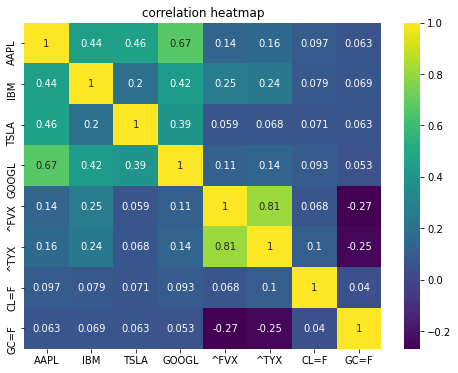

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(
    price_ret.corr(),
    cmap = 'viridis',
    annot = True,
    ax = ax
)
plt.title('correlation heatmap')
plt.show()

**Assignment 4.2**

모든 자산을 각각 12.5%씩 동일 가중으로 투자한다고 가정한 포트폴리오를 제작하세요.

In [13]:
port1=((0.125 * price_ret).sum(axis=1)).cumsum()
port1

2018-01-03    0.005792
2018-01-04    0.010641
2018-01-05    0.016106
2018-01-08    0.025229
2018-01-09    0.031533
                ...   
2024-02-16    0.982715
2024-02-20    0.974416
2024-02-21    0.976294
2023-11-23    0.971888
2024-02-19    0.978214
Length: 1545, dtype: float64

**Assignment 4.2**

위험자산에 60%, 국채에 30%, 원자재에 10%를 투자한다고 가정한 포트폴리오를 제작하세요. 단, 각 블럭 별로는 동일 비중으로 투자한다고 가정합니다.

In [14]:
stock=(0.6*0.25*price_ret[['AAPL','IBM','TSLA','GOOGL']]).sum(axis=1).cumsum()
bond=(0.3*0.5*price_ret[['^FVX','^TYX']]).sum(axis=1).cumsum()
commodity=(0.1*0.5*price_ret[['CL=F','GC=F']]).sum(axis=1).cumsum()
port2=stock+bond+commodity

**Assignment 4.3**

S&P500 Index의 데이터를 불러온 뒤, 제작한 포트폴리오들과 비교하세요. 비교를 위해 matplotlib로 시각화합니다. 포트폴리오는 시장의 성과를 상회합니까?

In [15]:
start_date='2018-01-01'
end_date='2024-02-22'
snp = yf.download('^GSPC', start_date, end_date)
ret_snp=snp.Close.pct_change().dropna().cumsum()

[*********************100%%**********************]  1 of 1 completed


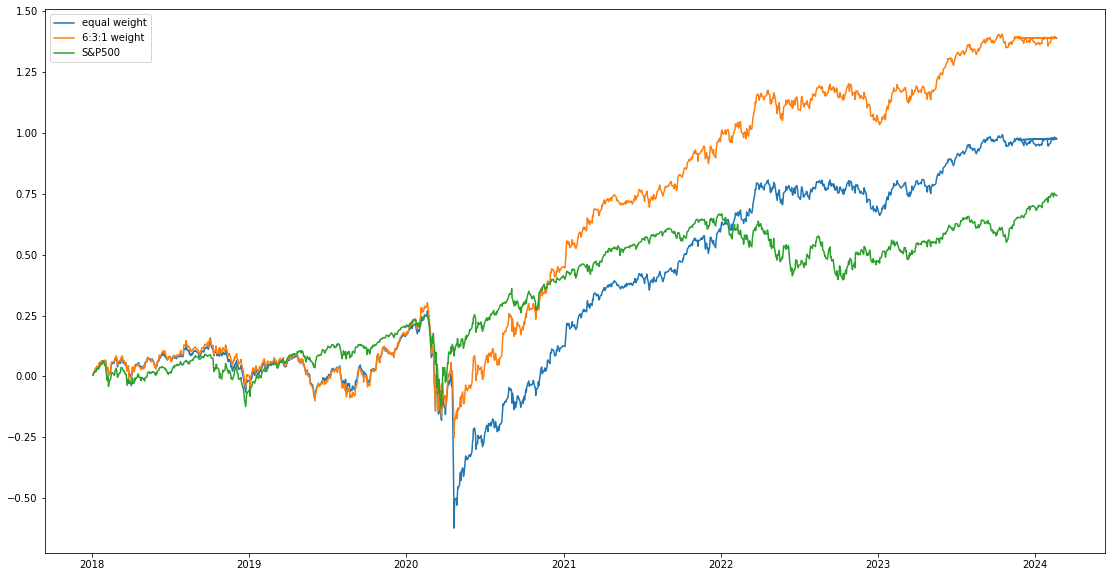

In [17]:
plt.figure(figsize=(19,10))
plt.plot(port1, label = 'equal weight')
plt.plot(port2, label = '6:3:1 weight')
plt.plot(ret_snp, label = 'S&P500')
plt.legend()
plt.show()